### Simple model for EATD-corpus

In [1]:
import pandas as pd
#dev
import importlib as imp
import functions
from functions import *

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [2]:
BASE_PATH = "datasets/EATD-Corpus"

labels = ['normal', 'mild', 'moderate', 'severe']
folders = os.listdir(BASE_PATH)
# in the folders there are three audio file, named negative_out, neutral_out and positive_out.wav
df = pd.read_csv('datasets/depression_categories_EATD-Corpus.csv')
# the depresison column contains different strings, we need to convert them to integers into a new column
df['depression_category_int'] = df['depression'].map({'normal': 0, 'mild': 1, 'moderate': 2, 'severe': 3})

df_train = df[df['type'] == 'training']
df_test = df[df['type'] == 'validation']

In [3]:
df.head(5)

,folder,SDS_raw,SDS_index,depression,type,depression_category_int
0,t_1,37.0,46.25,normal,training,0
1,t_10,30.0,37.50,normal,training,0
2,t_101,42.0,52.50,mild,training,1
3,t_102,66.0,82.50,severe,training,3
4,t_103,41.0,51.25,mild,training,1


### Step by step model building - BASE

In [ ]:
imp.reload(functions)
from functions import *
sentiments=['negative', 'neutral', 'positive']

BASE_PATH
X_train, y_train = process_audio_files(BASE_PATH, df_train, sentiments, method="complex")

In [ ]:
imp.reload(functions)
from functions import *

X_test, y_test = process_audio_files(BASE_PATH, df_test, sentiments, method="complex")

C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(



Processing Summary:
Successfully processed: 78 folders
Skipped: 1 files

Skipped Files Details:
Folder v_79: Error processing positive_out.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'


In [ ]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)
feature_importance_xgboost(clf, number_of_features=15)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_test = clf.predict(X_test)
y_pred_train = clf.predict(X_train)


Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        58
        mild       1.00      1.00      1.00        13
    moderate       1.00      1.00      1.00         9
      severe       1.00      1.00      1.00         3

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



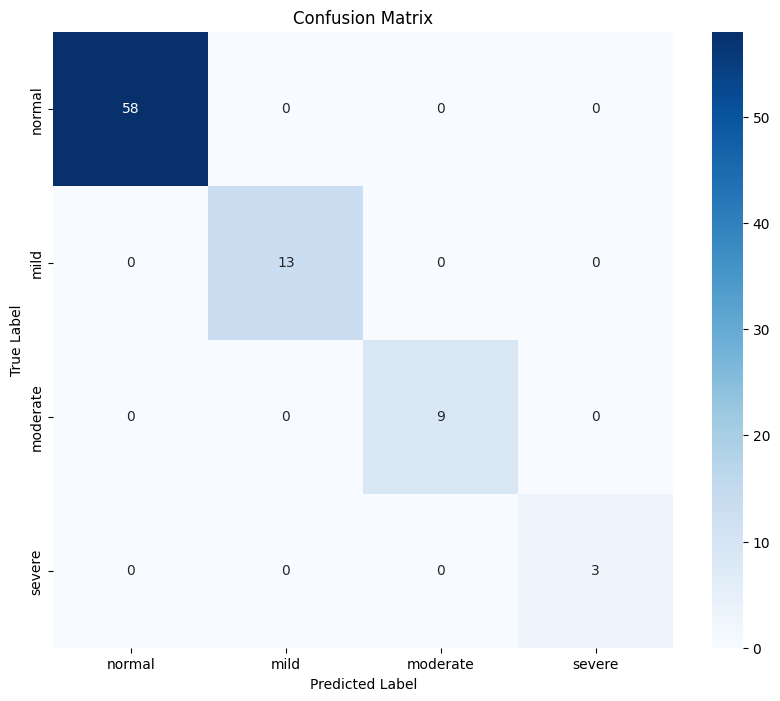


Classification Report:
              precision    recall  f1-score   support

      normal       0.76      0.67      0.72        58
        mild       0.44      0.24      0.31        17
    moderate       0.00      0.00      0.00         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.55        78
   macro avg       0.30      0.23      0.26        78
weighted avg       0.67      0.55      0.60        78



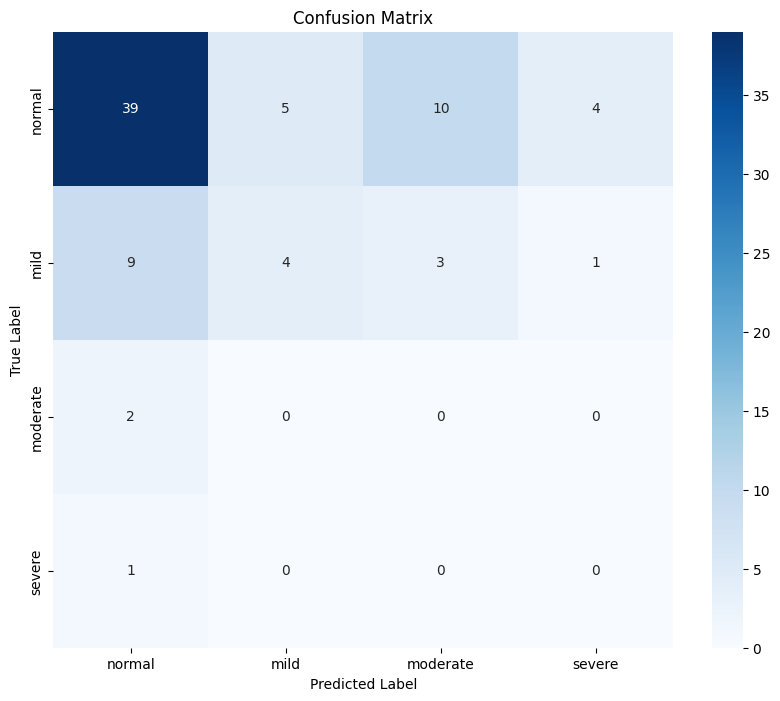

In [ ]:
imp.reload(functions)
from functions import *

confusion_matrix_report(y_train, y_pred_train, labels)
confusion_matrix_report(y_test, y_pred_test, labels)

## XGBoost

In [ ]:
imp.reload(functions)
from functions import *
sentiments=['negative', 'neutral', 'positive']
sentiments = ['positive']
X_train, y_train = process_audio_files(BASE_PATH, df_train, sentiments=sentiments)
X_test, y_test = process_audio_files(BASE_PATH, df_test, sentiments=sentiments)
XGBoostModel = train_and_evaluate_xgboost(X_train, y_train)


Processing Summary:
Successfully processed: 83 folders
Skipped: 0 files


C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(



Processing Summary:
Successfully processed: 78 folders
Skipped: 1 files

Skipped Files Details:
Folder v_79: Error processing positive_out.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'
Training XGBoost model with grid search...
Fitting 5 folds for each of 192 candidates, totalling 960 fits


C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(



Best parameters found:
colsample_bytree: 0.8
gamma: 0
learning_rate: 0.01
max_depth: 4
min_child_weight: 1
n_estimators: 100
subsample: 0.9


c:\Program Files\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [17:33:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



Classification Report:
              precision    recall  f1-score   support

      normal       0.94      1.00      0.97        58
        mild       1.00      0.92      0.96        13
    moderate       1.00      0.67      0.80         9
      severe       1.00      1.00      1.00         3

    accuracy                           0.95        83
   macro avg       0.98      0.90      0.93        83
weighted avg       0.95      0.95      0.95        83



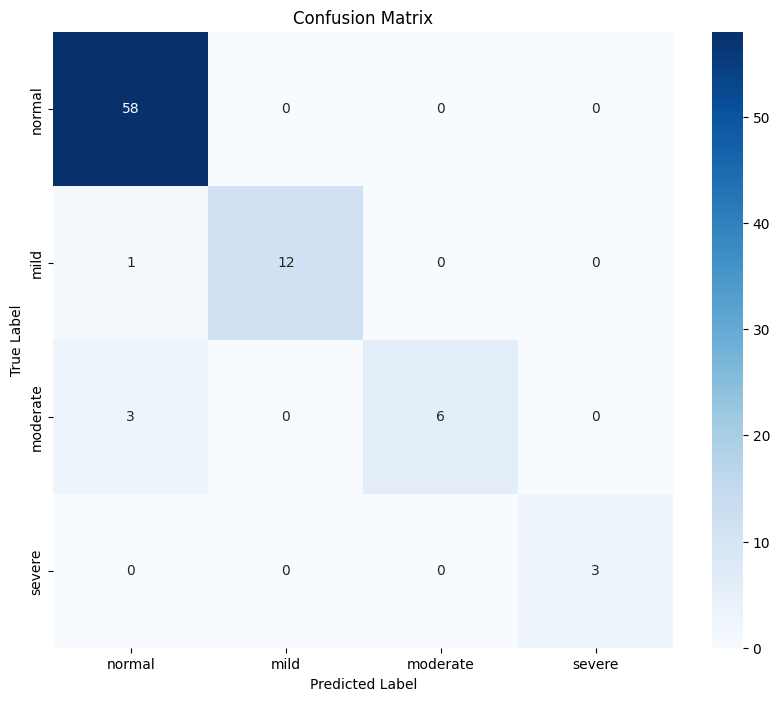

In [ ]:
imp.reload(functions)
from functions import *
y_pred_train = XGBoostModel.predict(X_train)
confusion_matrix_report(y_train, y_pred_train, labels)
# feature_importance_xgboost(XGBoostModel)


Classification Report:
              precision    recall  f1-score   support

      normal       0.76      0.91      0.83        58
        mild       0.43      0.18      0.25        17
    moderate       0.00      0.00      0.00         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.72        78
   macro avg       0.30      0.27      0.27        78
weighted avg       0.66      0.72      0.67        78



C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

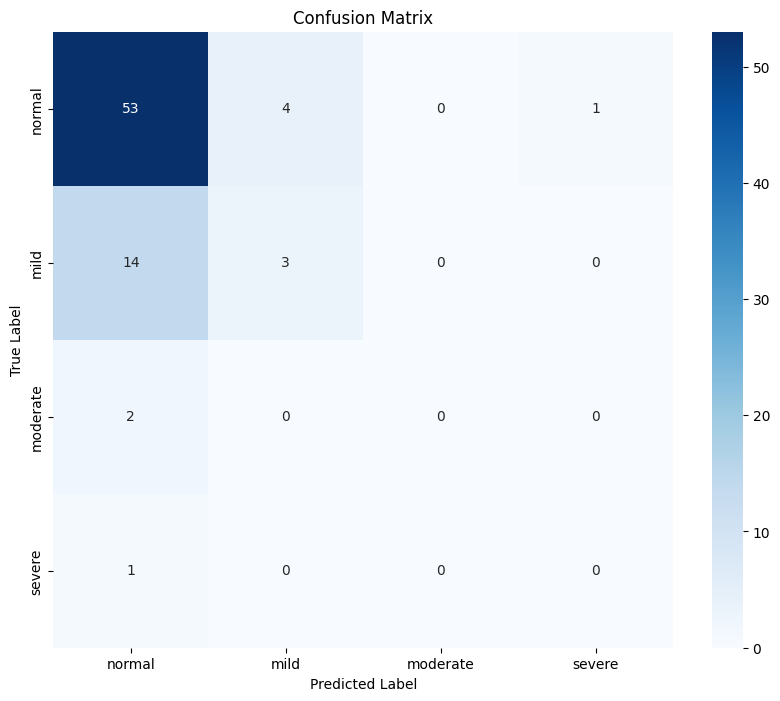

In [ ]:
y_pred_test = XGBoostModel.predict(X_test)
confusion_matrix_report(y_test, y_pred_test, labels)

-----------------

### Train with unbalanced datas

In [ ]:
imp.reload(functions)
from functions import *


sentiments=['negative', 'neutral', 'positive']
# sentiments = ['negative']
X_train, y_train = process_audio_files(BASE_PATH, df_train, sentiments=sentiments, method="complex")
X_test, y_test = process_audio_files(BASE_PATH, df_test, sentiments=sentiments, method="complex")


Processing Summary:
Successfully processed: 83 folders
Skipped: 0 files


C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\librosa\core\spectrum.py:266: UserWarning: n_fft=2048 is too large for input signal of length=0
  warnings.warn(



Processing Summary:
Successfully processed: 78 folders
Skipped: 1 files

Skipped Files Details:
Folder v_79: Error processing positive_out.wav: can't extend empty axis 0 using modes other than 'constant' or 'empty'



Training with smote strategy...

Initial class distribution:
Class 0: 58 samples
Class 1: 13 samples
Class 2: 9 samples
Class 3: 3 samples

Using 3-fold cross-validation due to class sizes

Applying SMOTE oversampling...

Class distribution after balancing:
Class 0: 58 samples
Class 1: 58 samples
Class 2: 58 samples
Class 3: 58 samples
Fitting 3 folds for each of 192 candidates, totalling 576 fits

Best parameters found:
colsample_bytree: 0.8
gamma: 0
learning_rate: 0.1
max_depth: 4
min_child_weight: 1
n_estimators: 200
subsample: 0.8

Training with undersample strategy...

Initial class distribution:
Class 0: 58 samples
Class 1: 13 samples
Class 2: 9 samples
Class 3: 3 samples

Using 3-fold cross-validation due to class sizes

Applying undersampling to majority class...

Class distribution after balancing:
Class 0: 3 samples
Class 1: 3 samples
Class 2: 3 samples
Class 3: 3 samples
Fitting 3 folds for each of 192 candidates, totalling 576 fits

Best parameters found:
colsample_bytree:

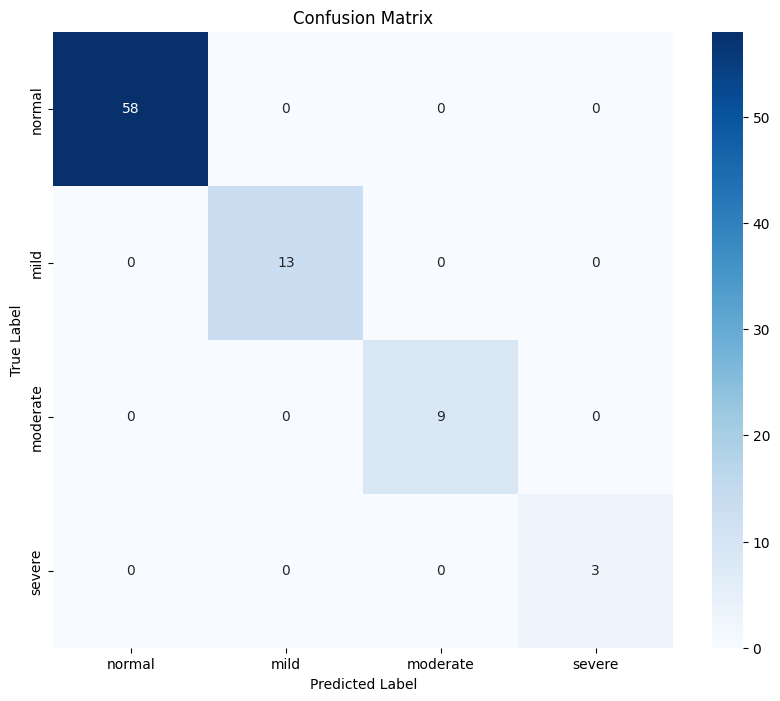


Classification Report:
              precision    recall  f1-score   support

      normal       0.74      0.98      0.84        58
        mild       0.00      0.00      0.00        17
    moderate       0.00      0.00      0.00         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.73        78
   macro avg       0.19      0.25      0.21        78
weighted avg       0.55      0.73      0.63        78



C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

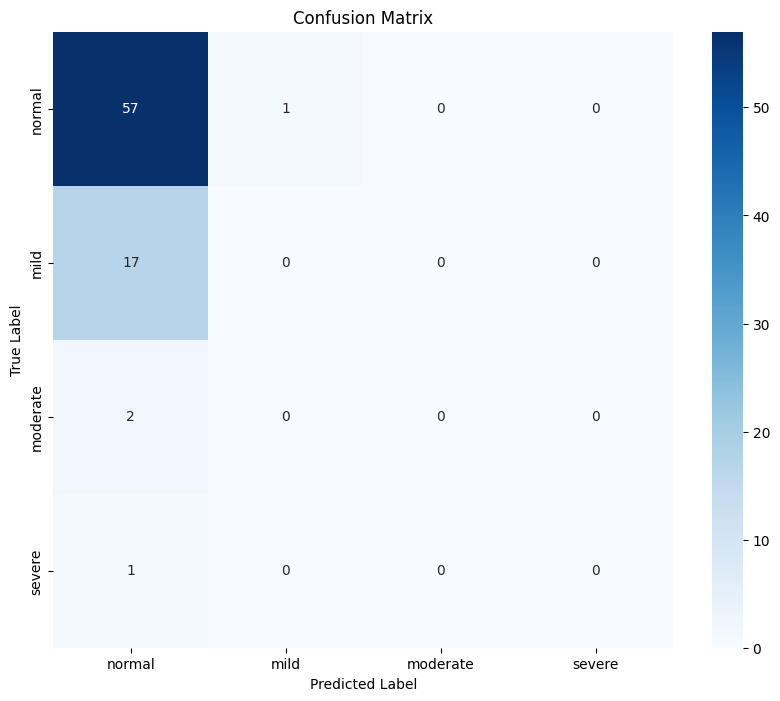


Results for undersample strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       0.83      0.52      0.64        58
        mild       0.43      0.46      0.44        13
    moderate       0.15      0.44      0.23         9
      severe       0.43      1.00      0.60         3

    accuracy                           0.52        83
   macro avg       0.46      0.61      0.48        83
weighted avg       0.68      0.52      0.56        83



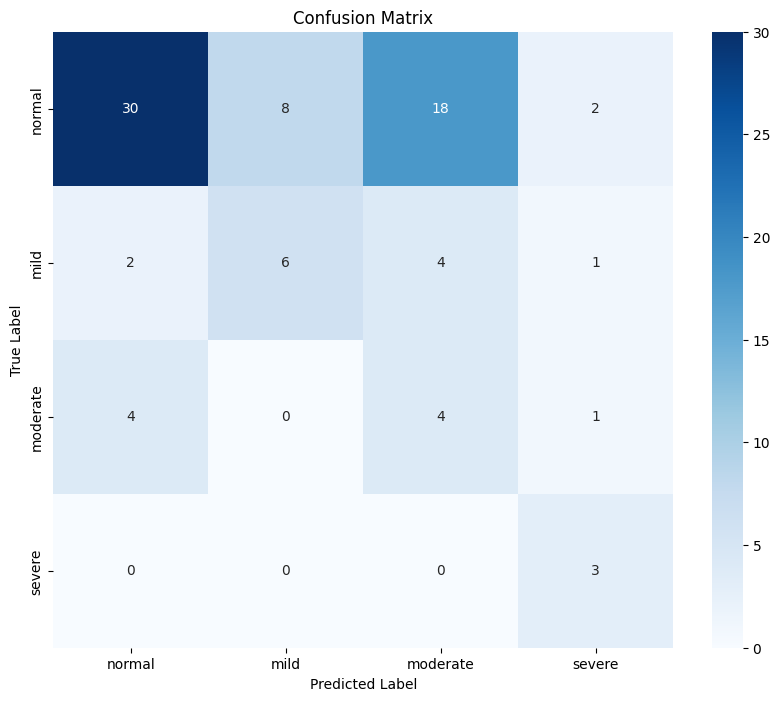


Classification Report:
              precision    recall  f1-score   support

      normal       0.73      0.41      0.53        58
        mild       0.12      0.06      0.08        17
    moderate       0.00      0.00      0.00         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.32        78
   macro avg       0.21      0.12      0.15        78
weighted avg       0.57      0.32      0.41        78



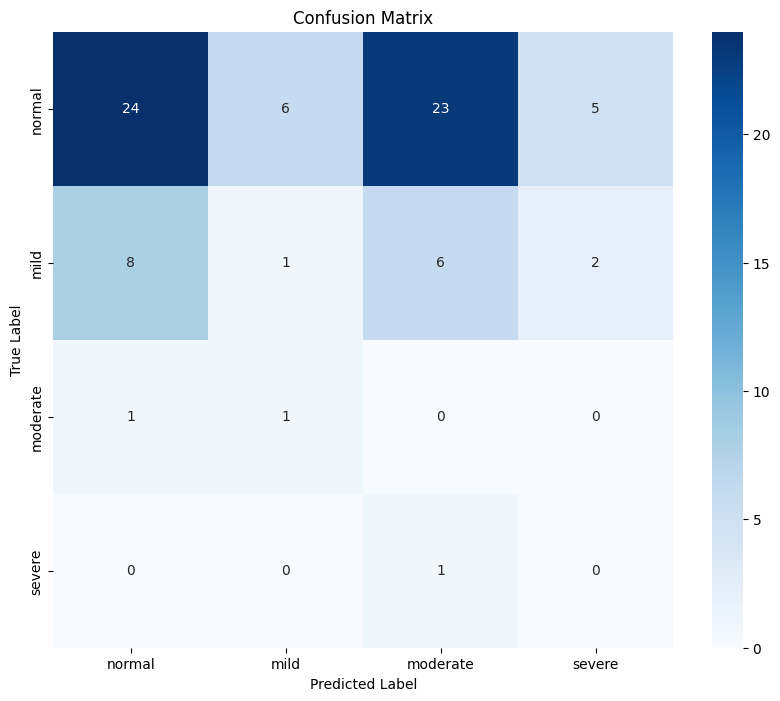


Results for combine strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        58
        mild       1.00      1.00      1.00        13
    moderate       1.00      1.00      1.00         9
      severe       1.00      1.00      1.00         3

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



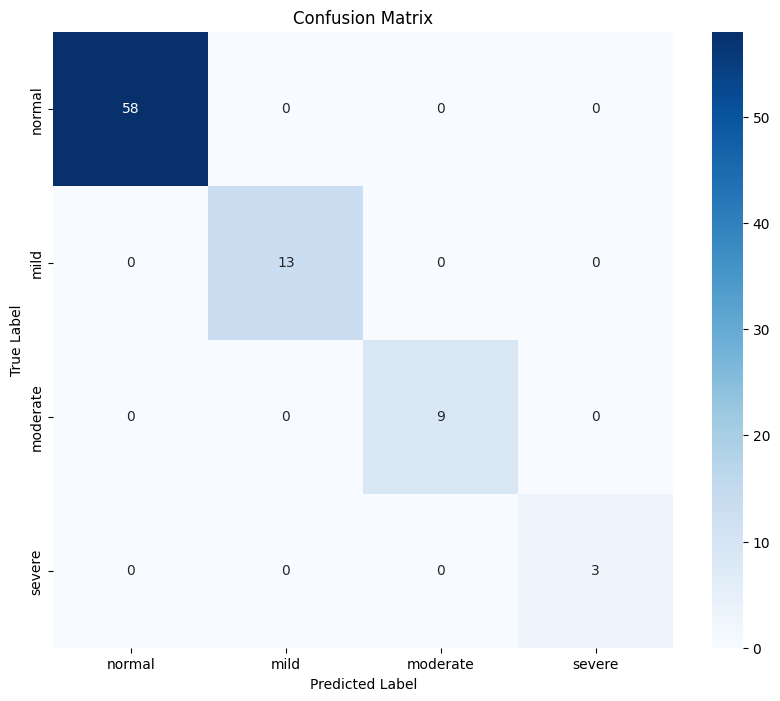


Classification Report:
              precision    recall  f1-score   support

      normal       0.73      0.93      0.82        58
        mild       0.00      0.00      0.00        17
    moderate       0.00      0.00      0.00         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.69        78
   macro avg       0.18      0.23      0.20        78
weighted avg       0.54      0.69      0.61        78



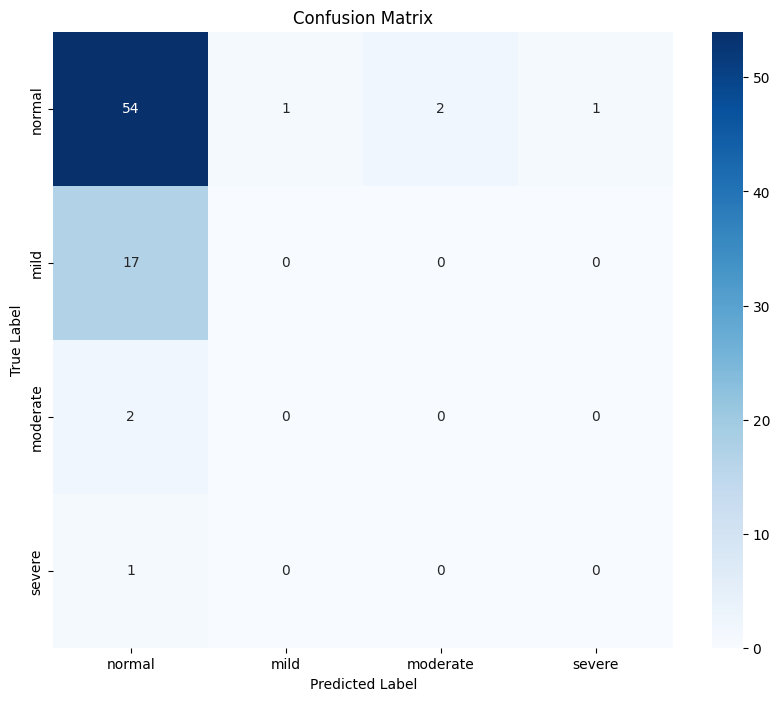


Results for weighted strategy:

Classification Report:
              precision    recall  f1-score   support

      normal       1.00      1.00      1.00        58
        mild       1.00      1.00      1.00        13
    moderate       1.00      1.00      1.00         9
      severe       1.00      1.00      1.00         3

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



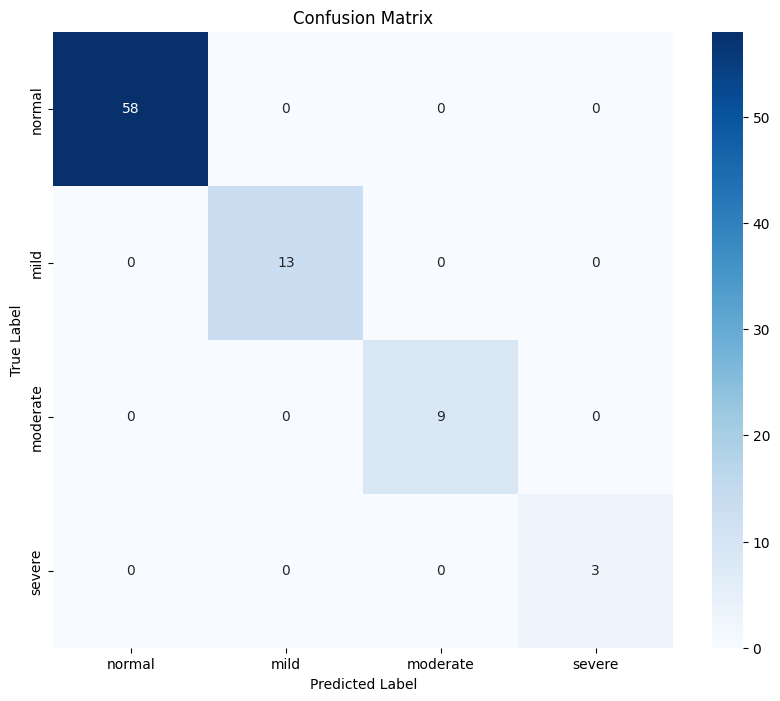


Classification Report:
              precision    recall  f1-score   support

      normal       0.75      0.97      0.84        58
        mild       0.00      0.00      0.00        17
    moderate       0.00      0.00      0.00         2
      severe       0.00      0.00      0.00         1

    accuracy                           0.72        78
   macro avg       0.19      0.24      0.21        78
weighted avg       0.56      0.72      0.63        78



C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Gergo Gyori\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metr

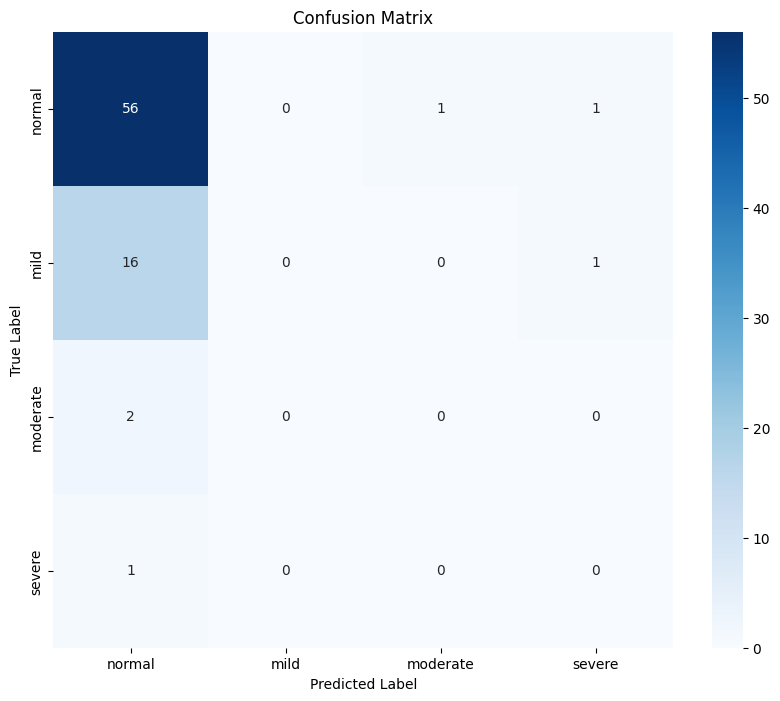

In [ ]:
imp.reload(functions)
from functions import *

strategies = ['smote', 'undersample', 'combine', 'weighted']
models = {}

for strategy in strategies:
    print(f"\nTraining with {strategy} strategy...")
    models[strategy] = train_balanced_xgboost_grid_search(X_train, y_train, balance_strategy=strategy)

for strategy in strategies:
    print(f"\nResults for {strategy} strategy:")
    y_pred_train = models[strategy].predict(X_train)
    confusion_matrix_report(y_train, y_pred_train, labels)
    y_pred_test = models[strategy].predict(X_test)
    confusion_matrix_report(y_test, y_pred_test, labels)